In [17]:
# Import the relevant libraries and classes
from dbm import BayesianDBM
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Read in data
df_states = pd.read_csv('./data/dar-cmand1DR-20210624-beh-states.csv')

# ...and remove non-intiated (i.e. sleeping, non-attentive) trials
df_states[~df_states['IsTargetOn'].isnull()];

In [32]:
# Extract logical array of stop(1)/no-stop(0) trials
stop_trial = np.array((df_states["TrialType"] == 1))

In [33]:
# Run Dynamic Belief Model
bdbm = BayesianDBM(stop_trial, alpha=0.9, prior=(1.0, 1.0))
# ... and extract the expected probability per trial
dbm_pStop = bdbm.get_p_per_trial()
# ... and the full posterior per trial
dbm_posterior = bdbm.get_full_posterior_per_trial()

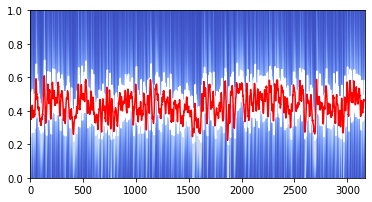

In [53]:
extent = -.5, len(stop_trial)-.5, 0, 1;
aspect = len(stop_trial) / 2.
averageStep = 10;
plt.imshow(dbm_posterior, cmap=plt.cm.coolwarm, origin='lower', extent=extent, aspect=aspect)
plt.plot(dbm_pStop, c='white')
plt.plot(np.convolve(dbm_pStop, np.ones(averageStep)/averageStep, mode='valid'), c='red')
